Я сделала датасет, состоящий из всех текстов, которые есть на стене группы ' 4GKZ|ЧГКЗ погнали на КОНЦЕРТ ' вконтакте.
Адрес группы:
https://vk.com/the4gkz

Группа существует около 4 лет, у них примерно 13 тысяч постов. Посты можно условно поделить на 2 части: 
    - маленькая информативная часть с анонсами концертов, фестивалей и т.п.
    - основная часть состоит из текстов следующего вида: "когда уже организаторы начнут принимать к оплате почки","что страшнее спидорак или буерак" и т.п.,  т.е. коротких постов без знаков препинания и заглавных букв, зато с кучей непонятной мне лексики)
Остальная часть датасета состоит из комментов и комментов к ним (комментов второго уровня).
Я не вижу принципиальных отличий между постами, комментами и комментами второго уровня, кроме следующих:
- у постов, как правило, больше всего лайков
- комменты к комментам часто начинаются с '[id'

Мне интересно:
 - смогу ли я научить какой-нибудь классификатор обращать внимание на эти признаки, 
 - и выделит ли какой-нибудь из классификаторов другие признаки, позволяющие делить датасет на заданные классы.
 
То, что классы очень сильно дисбалансированы, осложняет задачу_)


In [3]:
# загружаем датасет с текстами и лайками
import pandas as pd
df = pd.read_csv('gk4z_texts.csv')

Сейчас я поделю датасет на классы с помощью всего трех правил:
    - если текст начинается с "[", то запишем его в комменты второго уровня
    - если к тексту больше 30 лайков, то запишем его как пост.
    - остальное засчитывается как коммент.
Это будет наша baseline. И дальше я буду пытаться всеми способами её преодолеть))))

In [1]:
def rules_rule (row):
    if row['text'].startswith('['):
        return 'comment_to_comment'
    if row.likes > 30:
        return 'post'
    else:
        return 'comment'

In [7]:
df.text.fillna('', inplace=True) # заменяем нан на пустую строку

In [11]:
df['rules_label'] = df.apply(rules_rule, axis=1)

In [12]:
from sklearn.metrics import classification_report

print(classification_report(df.label, df.rules_label))

                    precision    recall  f1-score   support

           comment       0.93      0.82      0.87     37762
comment_to_comment       0.39      0.79      0.53      4625
              post       0.91      0.90      0.91     13813

       avg / total       0.88      0.84      0.85     56200



Baseline сама по себе достаточно высокая.

Сейчас я буду вытаскивать разные признаки из текстов. 
Мне помогли вот эти источники:

https://towardsdatascience.com/natural-language-processing-nlp-for-machine-learning-d44498845d5b

https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

https://www.coursera.org/learn/python-for-data-visualization/home/welcome

In [2]:
import pandas as pd
import re
import numpy as np
from nltk import word_tokenize
import nltk
import string


In [44]:
#!pip install emoji --upgrade

You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [5]:
import emoji
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('gk4z_texts.csv')

In [7]:
df.head()

,id,text,likes,label
0,76000,#конкурс@the4gkz \r\nДля вашего удобства собра...,17,post
1,76914,Уже сегодня ночью (по МСК) начнётся один из са...,34,post
2,76917,"Ого, Нина Кравиц в лайн-апе😲",0,comment
3,76920,"[id17823823|Анастасия], с новым крутым шоу от ...",0,comment_to_comment
4,76922,Скину расписание на сегодня сюда. Время москов...,0,comment


#### Частотный словарь
Сначала токенизируем весь текст и сделаем частотный словарь: посмотрим, что вообще там происходит

In [8]:
df.text.fillna('', inplace=True) # заменяем нан на пустую строку

In [9]:
corpus_post_noisefull = [token for text in df.text for token in word_tokenize(text.lower())]
print(len(corpus_post_noisefull))

736427


In [10]:
freq_dict = Counter(corpus_post_noisefull) # делаем частотный словарь токенов

In [11]:
freq_dict.most_common(100) # смотрим самые частотные токены

[(',', 44408),
 ('в', 16928),
 ('.', 14378),
 ('и', 14336),
 ('на', 13617),
 ('не', 13175),
 ('[', 11027),
 (']', 11027),
 (')', 10071),
 ('что', 8113),
 ('а', 6393),
 ('?', 6071),
 ('я', 5727),
 ('!', 5722),
 ('с', 5650),
 ('как', 5262),
 ('это', 5194),
 ('-', 4663),
 ('(', 3937),
 ('#', 3558),
 ('@', 3503),
 ('the4gkz', 3414),
 ('у', 3338),
 ('если', 3238),
 ('но', 3158),
 ('так', 3011),
 (':', 2930),
 ('за', 2832),
 ('когда', 2632),
 ('все', 2607),
 ('ли', 2496),
 ('по', 2321),
 ('или', 2268),
 ('—', 2235),
 ('из', 2233),
 ('то', 2170),
 ('концерт', 2049),
 ('the', 2043),
 ('уже', 2022),
 ('же', 2010),
 ('...', 1975),
 ('ну', 1834),
 ('они', 1825),
 ('да', 1740),
 ('можно', 1644),
 ('бы', 1628),
 ('для', 1599),
 ('почему', 1575),
 ('только', 1543),
 ('мне', 1521),
 ('от', 1517),
 ('меня', 1509),
 ('нет', 1501),
 ('к', 1481),
 ('их', 1463),
 ('есть', 1451),
 ('вот', 1401),
 ('ещё', 1383),
 ("''", 1369),
 ('было', 1354),
 ('группы', 1341),
 ('просто', 1338),
 ('``', 1337),
 ('альбом',

#### Количество знаков

In [12]:
df['len_char'] = df.text.apply(lambda x: len(x)) # колонка со количеством знаков, включая пробелы

#### Пунктуация:

In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
my_punct = '«»'+ '...' + '``' + "''" + '•' + '—'+ string.punctuation # расширим список пунктуации знаками из частотного словаря

In [15]:
my_punct

'«»...``\'\'•—!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def get_punct(row):
    str_punct = ''
    for el in row['text']:
        if el in my_punct:
            str_punct += el
    return str_punct

In [17]:
df['punct']= df.apply(get_punct, axis = 1)

In [18]:
df['punct_count'] = df.punct.apply(lambda x: len(x))


In [19]:
df['punct%'] = df['punct_count']/df['len_char']

In [20]:
df['punct%'].fillna(0, inplace=True) # заменяем нан на ноль

#### Токенизация:

In [22]:
df['tokens'] = df.text.apply(lambda x: word_tokenize(x)) # колонка с токенами(nltk-tokenizer)

In [23]:
df.head()

,id,text,likes,label,len_char,punct,punct_count,punct%,tokens
0,76000,#конкурс@the4gkz \r\nДля вашего удобства собра...,17,post,503,"#@.:•|-.—:./:./•|-.—/:./:://./|://./•|.—:./:.,!",47,0.093439,"[#, конкурс, @, the4gkz, Для, вашего, удобства..."
1,76914,Уже сегодня ночью (по МСК) начнётся один из са...,34,post,669,"()—.—()!..,!(),—(,).:://..//",28,0.041854,"[Уже, сегодня, ночью, (, по, МСК, ), начнётся,..."
2,76917,"Ого, Нина Кравиц в лайн-апе😲",0,comment,28,",-",2,0.071429,"[Ого, ,, Нина, Кравиц, в, лайн-апе😲]"
3,76920,"[id17823823|Анастасия], с новым крутым шоу от ...",0,comment_to_comment,56,"[|],",4,0.071429,"[[, id17823823|Анастасия, ], ,, с, новым, крут..."
4,76922,Скину расписание на сегодня сюда. Время москов...,0,comment,687,..:......&....:..........:......&.....,38,0.055313,"[Скину, расписание, на, сегодня, сюда, ., Врем..."


In [24]:
df['tokens_count'] = df.tokens.apply(lambda x: len(x)) # колонка с количеством токенов

In [25]:
df['tokens%'] = df['tokens_count']/df['len_char']

#### Смайлики

In [26]:
def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.UNICODE_EMOJI)

In [27]:
df['smiles']=df.text.apply(lambda x: extract_emojis(x)) # вытащили смайлы из текста

In [29]:
df.smiles.fillna('', inplace=True)

In [30]:
df['smiles_count'] = df.smiles.apply(lambda x: len(x))  # добавили колонку с количеством смайлов

In [31]:
df['smiles%'] = df['smiles_count']/df['len_char']

In [32]:
df.fillna(0, inplace=True) # заменяем нан на пустую строку

In [33]:
df

,id,text,likes,label,len_char,punct,punct_count,punct%,tokens,tokens_count,tokens%,smiles,smiles_count,smiles%
0,76000,#конкурс@the4gkz \r\nДля вашего удобства собра...,17,post,503,"#@.:•|-.—:./:./•|-.—/:./:://./|://./•|.—:./:.,!",47,0.093439,"[#, конкурс, @, the4gkz, Для, вашего, удобства...",81,0.161034,,0,0.000000
1,76914,Уже сегодня ночью (по МСК) начнётся один из са...,34,post,669,"()—.—()!..,!(),—(,).:://..//",28,0.041854,"[Уже, сегодня, ночью, (, по, МСК, ), начнётся,...",111,0.165919,,0,0.000000
2,76917,"Ого, Нина Кравиц в лайн-апе😲",0,comment,28,",-",2,0.071429,"[Ого, ,, Нина, Кравиц, в, лайн-апе😲]",6,0.214286,😲,1,0.035714
3,76920,"[id17823823|Анастасия], с новым крутым шоу от ...",0,comment_to_comment,56,"[|],",4,0.071429,"[[, id17823823|Анастасия, ], ,, с, новым, крут...",11,0.196429,,0,0.000000
4,76922,Скину расписание на сегодня сюда. Время москов...,0,comment,687,..:......&....:..........:......&.....,38,0.055313,"[Скину, расписание, на, сегодня, сюда, ., Врем...",112,0.163028,,0,0.000000
5,76933,"[id18399319|Anastasia], неправда, в Москве вре...",0,comment_to_comment,85,"[|],,,",6,0.070588,"[[, id18399319|Anastasia, ], ,, неправда, ,, в...",17,0.200000,,0,0.000000
6,76929,"Трансляция, конечно, моё почтение. Классно выг...",1,comment,66,",,..",4,0.060606,"[Трансляция, ,, конечно, ,, моё, почтение, ., ...",12,0.181818,,0,0.000000
7,76930,"Моё увожение Блэкпинк, которые даже с живыми и...",1,comment,83,",.",2,0.024096,"[Моё, увожение, Блэкпинк, ,, которые, даже, с,...",14,0.168675,🤘,1,0.012048
8,76934,"Часть пропустила, конец сета у SG Lewis был кл...",0,comment,307,",.-,,.-,-",9,0.029316,"[Часть, пропустила, ,, конец, сета, у, SG, Lew...",56,0.182410,🙀🔥,2,0.006515
9,76935,"сейчас посмотрела лайв Rufus Du Sol, очень бод...",0,comment,134,",.,",3,0.022388,"[сейчас, посмотрела, лайв, Rufus, Du, Sol, ,, ...",21,0.156716,,0,0.000000


##### Цифры

In [47]:
df['numbers_count']=df.text.apply(lambda x: len(re.findall('\d', x)))

In [49]:
df['numbers%'] = df['numbers_count']/df['len_char']

In [51]:
df['numbers%'].fillna(0, inplace=True)

##### Латиница

In [54]:
df['latin_count']=df.text.apply(lambda x: len(re.findall('[a-zA-Z]', x)))

In [58]:
df

,id,text,likes,label,len_char,punct,punct_count,punct%,tokens,tokens_count,tokens%,smiles,smiles_count,smiles%,numbers_count,numbers%,latin_count,latin%
0,76000,#конкурс@the4gkz \r\nДля вашего удобства собра...,17,post,503,"#@.:•|-.—:./:./•|-.—/:./:://./|://./•|.—:./:.,!",47,0.093439,"[#, конкурс, @, the4gkz, Для, вашего, удобства...",81,0.161034,,0,0.000000,23,0.045726,116,0.230616
1,76914,Уже сегодня ночью (по МСК) начнётся один из са...,34,post,669,"()—.—()!..,!(),—(,).:://..//",28,0.041854,"[Уже, сегодня, ночью, (, по, МСК, ), начнётся,...",111,0.165919,,0,0.000000,0,0.000000,49,0.073244
2,76917,"Ого, Нина Кравиц в лайн-апе😲",0,comment,28,",-",2,0.071429,"[Ого, ,, Нина, Кравиц, в, лайн-апе😲]",6,0.214286,😲,1,0.035714,0,0.000000,0,0.000000
3,76920,"[id17823823|Анастасия], с новым крутым шоу от ...",0,comment_to_comment,56,"[|],",4,0.071429,"[[, id17823823|Анастасия, ], ,, с, новым, крут...",11,0.196429,,0,0.000000,8,0.142857,2,0.035714
4,76922,Скину расписание на сегодня сюда. Время москов...,0,comment,687,..:......&....:..........:......&.....,38,0.055313,"[Скину, расписание, на, сегодня, сюда, ., Врем...",112,0.163028,,0,0.000000,127,0.184862,332,0.483261
5,76933,"[id18399319|Anastasia], неправда, в Москве вре...",0,comment_to_comment,85,"[|],,,",6,0.070588,"[[, id18399319|Anastasia, ], ,, неправда, ,, в...",17,0.200000,,0,0.000000,8,0.094118,11,0.129412
6,76929,"Трансляция, конечно, моё почтение. Классно выг...",1,comment,66,",,..",4,0.060606,"[Трансляция, ,, конечно, ,, моё, почтение, ., ...",12,0.181818,,0,0.000000,0,0.000000,0,0.000000
7,76930,"Моё увожение Блэкпинк, которые даже с живыми и...",1,comment,83,",.",2,0.024096,"[Моё, увожение, Блэкпинк, ,, которые, даже, с,...",14,0.168675,🤘,1,0.012048,0,0.000000,0,0.000000
8,76934,"Часть пропустила, конец сета у SG Lewis был кл...",0,comment,307,",.-,,.-,-",9,0.029316,"[Часть, пропустила, ,, конец, сета, у, SG, Lew...",56,0.182410,🙀🔥,2,0.006515,4,0.013029,40,0.130293
9,76935,"сейчас посмотрела лайв Rufus Du Sol, очень бод...",0,comment,134,",.,",3,0.022388,"[сейчас, посмотрела, лайв, Rufus, Du, Sol, ,, ...",21,0.156716,,0,0.000000,0,0.000000,10,0.074627


In [56]:
df['latin%'] = df['latin_count']/df['len_char']

In [57]:
df['latin%'].fillna(0, inplace=True)

In [59]:
df.to_csv('gk4z_features.csv', index=False, encoding='utf-8')

### Посмотрим, есть ли польза от получившихся признаков



Проверим некоторые признаки. Сначала посмотрим на самый первый и очевидный признак - 
##### количество лайков 

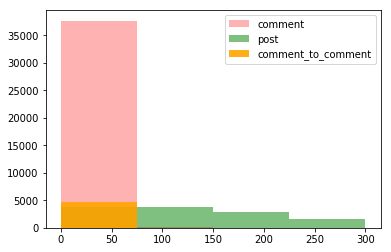

In [174]:
bins= np.linspace(0,300, 5) #Returns num evenly spaced samples, calculated over the interval [start, stop]
plt.hist(df[df['label']== 'comment']['likes'],  bins, alpha = 0.3,   label = 'comment', color = 'red')

plt.hist(df[df['label']== 'post']['likes'], bins, alpha = 0.5, label = 'post', color='green')

plt.hist(df[df['label']== 'comment_to_comment']['likes'], bins, alpha = 0.9, label = 'comment_to_comment', color='orange' )

plt.legend(loc = 'upper right')
plt.show()

Из гистограммы видно, что:
    1. Комментов сильно больше, чем всего остального
    2. У комментов, в основном, мало лайков.
    3. У комментов второго уровня тоже мало лайков, и их меньше, чем всего остального. 
    4. Количество лайков к постам распределяется достаточно равномерно от 0 до 200
    5. Таким образом, по признаку "likes" можно отличить посты от всего остального, но нельзя отличить комменты от комментов второго уровня

##### Количество знаков в тексте

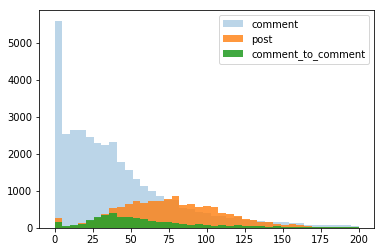

In [172]:
bins= np.linspace(0,200, 40) #Returns num evenly spaced samples, calculated over the interval [start, stop]
plt.hist(df[df['label']== 'comment']['len_char'], bins,  alpha = 0.3, log=False, label = 'comment')

plt.hist(df[df['label']== 'post']['len_char'], bins, alpha = 0.8, label = 'post')
plt.hist(df[df['label']== 'comment_to_comment']['len_char'], bins, alpha = 0.9, label = 'comment_to_comment')
plt.legend(loc = 'upper right')
plt.show()

У постов в среднем больше знаков в текстах, чем у комментов

##### Знаки препинания

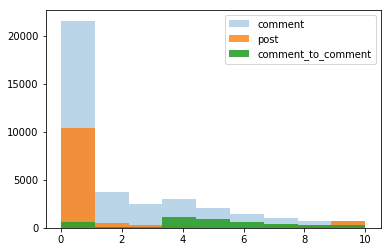

In [190]:
bins= np.linspace(0,10, 10) #Returns num evenly spaced samples, calculated over the interval [start, stop]
plt.hist(df[df['label']== 'comment']['punct_count'], bins, alpha = 0.3, log=False, label = 'comment')

plt.hist(df[df['label']== 'post']['punct_count'], bins, alpha = 0.8, label = 'post')
plt.hist(df[df['label']== 'comment_to_comment']['punct_count'], bins, alpha = 0.9, label = 'comment_to_comment')
plt.legend(loc = 'upper right')
plt.show()

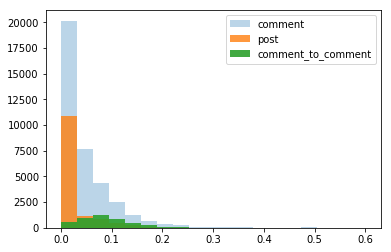

In [196]:
bins= np.linspace(0,0.6, 20) #Returns num evenly spaced samples, calculated over the interval [start, stop]
plt.hist(df[df['label']== 'comment']['punct%'], bins, alpha = 0.3, log=False, label = 'comment')

plt.hist(df[df['label']== 'post']['punct%'], bins, alpha = 0.8, label = 'post')
plt.hist(df[df['label']== 'comment_to_comment']['punct%'], bins, alpha = 0.9, label = 'comment_to_comment')
plt.legend(loc = 'upper right')
plt.show()

Возможно, знаки препинания помогут распознать комменты к комментам

Вот такой датасет у нас в итоге получился:

In [13]:
df

,id,text,likes,label,len_char,punct,punct_count,punct%,tokens,tokens_count,tokens%,smiles,smiles_count,smiles%,numbers_count,numbers%,latin_count,latin%
0,76000,#конкурс@the4gkz \r\r\r\nДля вашего удобства с...,17,post,503,"#@.:•|-.—:./:./•|-.—/:./:://./|://./•|.—:./:.,!",47,0.093439,"['#', 'конкурс', '@', 'the4gkz', 'Для', 'вашег...",81,0.161034,NaN,0,0.000000,23,0.045726,116,0.230616
1,76914,Уже сегодня ночью (по МСК) начнётся один из са...,34,post,669,"()—.—()!..,!(),—(,).:://..//",28,0.041854,"['Уже', 'сегодня', 'ночью', '(', 'по', 'МСК', ...",111,0.165919,NaN,0,0.000000,0,0.000000,49,0.073244
2,76917,"Ого, Нина Кравиц в лайн-апе😲",0,comment,28,",-",2,0.071429,"['Ого', ',', 'Нина', 'Кравиц', 'в', 'лайн-апе😲']",6,0.214286,😲,1,0.035714,0,0.000000,0,0.000000
3,76920,"[id17823823|Анастасия], с новым крутым шоу от ...",0,comment_to_comment,56,"[|],",4,0.071429,"['[', 'id17823823|Анастасия', ']', ',', 'с', '...",11,0.196429,NaN,0,0.000000,8,0.142857,2,0.035714
4,76922,Скину расписание на сегодня сюда. Время москов...,0,comment,687,..:......&....:..........:......&.....,38,0.055313,"['Скину', 'расписание', 'на', 'сегодня', 'сюда...",112,0.163028,NaN,0,0.000000,127,0.184862,332,0.483261
5,76933,"[id18399319|Anastasia], неправда, в Москве вре...",0,comment_to_comment,85,"[|],,,",6,0.070588,"['[', 'id18399319|Anastasia', ']', ',', 'непра...",17,0.200000,NaN,0,0.000000,8,0.094118,11,0.129412
6,76929,"Трансляция, конечно, моё почтение. Классно выг...",1,comment,66,",,..",4,0.060606,"['Трансляция', ',', 'конечно', ',', 'моё', 'по...",12,0.181818,NaN,0,0.000000,0,0.000000,0,0.000000
7,76930,"Моё увожение Блэкпинк, которые даже с живыми и...",1,comment,83,",.",2,0.024096,"['Моё', 'увожение', 'Блэкпинк', ',', 'которые'...",14,0.168675,🤘,1,0.012048,0,0.000000,0,0.000000
8,76934,"Часть пропустила, конец сета у SG Lewis был кл...",0,comment,307,",.-,,.-,-",9,0.029316,"['Часть', 'пропустила', ',', 'конец', 'сета', ...",56,0.182410,🙀🔥,2,0.006515,4,0.013029,40,0.130293
9,76935,"сейчас посмотрела лайв Rufus Du Sol, очень бод...",0,comment,134,",.,",3,0.022388,"['сейчас', 'посмотрела', 'лайв', 'Rufus', 'Du'...",21,0.156716,NaN,0,0.000000,0,0.000000,10,0.074627


In [96]:
# Запишем его в файл
df.to_csv('gk4z_features.csv', index=False, encoding='utf-8')